In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estimated QuantitySold
def calculate_quantity_sold(row):
    quantity_sold = row["QuantitySold"]
    if (
        pd.isnull(quantity_sold)
        and not pd.isnull(row["SalesAmount"])
        and not pd.isnull(row["SalesUnitPrice"])
    ):
        quantity_sold = np.floor(row["SalesAmount"] / row["SalesUnitPrice"])
    return quantity_sold

In [3]:
# Estimated QuantitySold
def calculate_sales_amount(row):
    sales_amount = row["SalesAmount"]
    if (
        pd.isnull(sales_amount)
        and not pd.isnull(row["QuantitySold"])
        and not pd.isnull(row["SalesUnitPrice"])
    ):
        sales_amount = row["QuantitySold"] * row["SalesUnitPrice"]
    return sales_amount

In [4]:
# Dataframe creation

df_a = pd.read_csv("C:\\Users\\bruno.sansoni\\Dev\\TestEnv\\DataSourceA_SalesTransactions.csv")
df_b = pd.read_csv("C:\\Users\\bruno.sansoni\\Dev\\TestEnv\\DataSourceB_ProductDetails.csv")

In [5]:
# Basic dataframe exploration
print("SalesTransactions:")
print(df_a.head())

print("\nProductDetails:")
print(df_b.head())

SalesTransactions:
              DateTime ProductID  QuantitySold StoreLocation  SalesAmount
0  2022-01-01 03:37:00      P016           3.0       Store_D       103.87
1  2022-01-01 00:43:00      P016           8.0       Store_D       241.28
2  2022-01-03 22:24:00      P016           2.0       Store_C        62.25
3  2022-01-08 19:21:00      P016          10.0       Store_C       311.76
4  2022-01-10 00:43:00      P016           8.0       Store_C       272.07

ProductDetails:
  ProductID ProductName     Category  SalesUnitPrice PurchaseUnitPrice  \
0      P001      Laptop  Electronics           94.51             59.53   
1      P002  Smartphone  Electronics           65.49             39.35   
2      P003      Tablet  Electronics           93.91             70.19   
3      P004  Headphones  Electronics           67.37             41.92   
4      P005  Smartwatch  Electronics           87.41             62.92   

     Supplier  
0  Supplier_4  
1  Supplier_4  
2  Supplier_2  
3  Supplier

In [6]:
# Find if there are null values in dataframes
null_values_a = df_a.isnull().sum()
null_values_b = df_b.isnull().sum()

print("\nNull values in Data Source A:")
print(null_values_a)

print("\nNull values in ProductDetails:")
print(null_values_b)


Null values in Data Source A:
DateTime         0
ProductID        0
QuantitySold     3
StoreLocation    0
SalesAmount      3
dtype: int64

Null values in ProductDetails:
ProductID            0
ProductName          0
Category             0
SalesUnitPrice       0
PurchaseUnitPrice    0
Supplier             0
dtype: int64


In [7]:
# If we have non numeric data where we are expecting numeric, we take take them as NaN
df_a["QuantitySold"] = pd.to_numeric(df_a["QuantitySold"], errors="coerce")
df_a["SalesAmount"] = pd.to_numeric(df_a["SalesAmount"], errors="coerce")
df_b["SalesUnitPrice"] = pd.to_numeric(df_b["SalesUnitPrice"], errors="coerce")
df_b["PurchaseUnitPrice"] = pd.to_numeric(df_b["PurchaseUnitPrice"], errors="coerce")

# Conversion of negative values in positives
df_a["QuantitySold"] = df_a["QuantitySold"].abs()
df_a["SalesAmount"] = df_a["SalesAmount"].abs()
df_b["SalesUnitPrice"] = df_b["SalesUnitPrice"].abs()
df_b["PurchaseUnitPrice"] = df_b["PurchaseUnitPrice"].abs()

In [8]:
# Datasets merge and csv creation
merged_df = pd.merge(df_a, df_b, on="ProductID")
merged_df.to_csv("C:\\Users\\bruno.sansoni\\Dev\\TestEnv\\merged_data.csv", index=False)
print("Merge:")
print(merged_df.head())

Merge:
              DateTime ProductID  QuantitySold StoreLocation  SalesAmount  \
0  2022-01-01 03:37:00      P016           3.0       Store_D       103.87   
1  2022-01-01 00:43:00      P016           8.0       Store_D       241.28   
2  2022-01-03 22:24:00      P016           2.0       Store_C        62.25   
3  2022-01-08 19:21:00      P016          10.0       Store_C       311.76   
4  2022-01-10 00:43:00      P016           8.0       Store_C       272.07   

  ProductName Category  SalesUnitPrice  PurchaseUnitPrice    Supplier  
0     Toy Car     Toys            31.8              22.25  Supplier_3  
1     Toy Car     Toys            31.8              22.25  Supplier_3  
2     Toy Car     Toys            31.8              22.25  Supplier_3  
3     Toy Car     Toys            31.8              22.25  Supplier_3  
4     Toy Car     Toys            31.8              22.25  Supplier_3  


In [10]:
# Quick test for estimated QuantitySold
row_test_QS = merged_df.iloc[12]
quantity_sold_test_QS = calculate_quantity_sold(row_test_QS)
print(row_test_QS["SalesAmount"])
print(row_test_QS["SalesUnitPrice"])
print(f"Estimated QuantitySold: {quantity_sold_test_QS}")

96.75
31.8
Estimated QuantitySold: 3.0


In [11]:
# Quick test for estimated SalesAmount

row_test_SA = merged_df.iloc[16]  # La riga 17 corrisponde all'indice 16 (0-based indexing)
sales_amount_test_SA = calculate_sales_amount(row_test_SA)
print(row_test_SA["QuantitySold"])
print(row_test_SA["SalesUnitPrice"])
print(f"Estimated SalesAmount: {sales_amount_test_SA}")

2.0
31.8
Estimated SalesAmount: 63.6


In [12]:
# Split the datetime by partitoned date
merged_df["DateTime"] = pd.to_datetime(merged_df["DateTime"])
merged_df["Year"] = merged_df["DateTime"].dt.year
merged_df["Month"] = merged_df["DateTime"].dt.month
merged_df["Day"] = merged_df["DateTime"].dt.day

In [13]:
# 1. Total Sales Revenue by Product Category and Year
total_sales_revenue = (merged_df.groupby(["Category", "Year"])["SalesAmount"].sum().reset_index())
print("\nTotal Sales Revenue by Product Category and Year:")
print(total_sales_revenue)

# If we want to sort by a specific field:
# total_sales_revenue = total_sales_revenue.sort_values(by='SalesAmount', ascending=False)


Total Sales Revenue by Product Category and Year:
       Category  Year  SalesAmount
0      Clothing  2022    483201.89
1      Clothing  2023    463373.26
2      Clothing  2024    318658.00
3   Electronics  2022    599455.72
4   Electronics  2023    608134.09
5   Electronics  2024    395815.75
6          Home  2022    394502.94
7          Home  2023    409190.26
8          Home  2024    249707.74
9          Toys  2022    227522.71
10         Toys  2023    241780.63
11         Toys  2024    176320.13


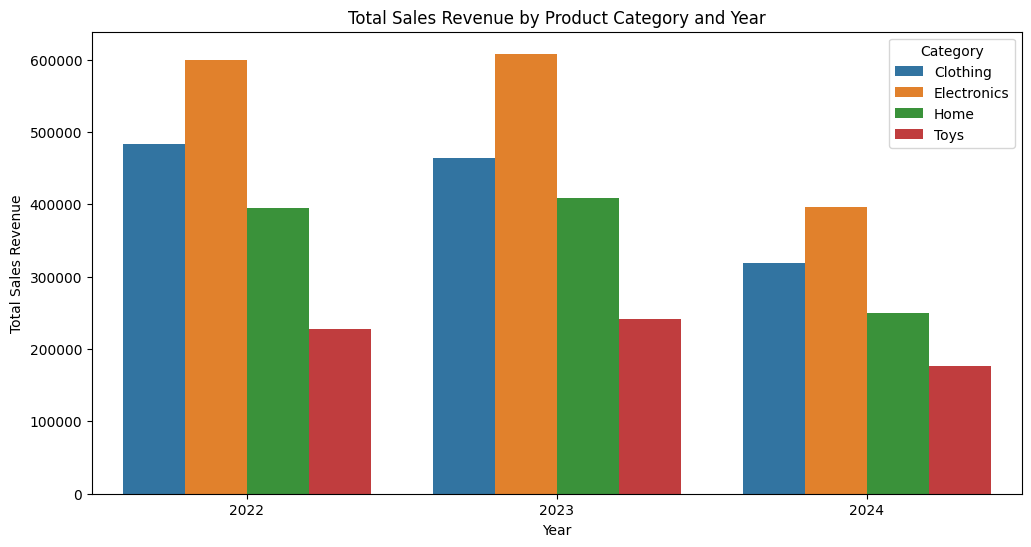

In [14]:
# Quick histogram aggregated by category and year
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="SalesAmount", hue="Category", data=total_sales_revenue)
plt.title("Total Sales Revenue by Product Category and Year")
plt.xlabel("Year")
plt.ylabel("Total Sales Revenue")
plt.legend(title="Category")
plt.show()

In [15]:
# 2. Profit Margin by Product Category and Year
merged_df["Profit"] = (merged_df["SalesUnitPrice"] - merged_df["PurchaseUnitPrice"]) * merged_df["QuantitySold"]
profit_margin = merged_df.groupby(["Category", "Year"])["Profit"].sum().reset_index()

print("\nProfit Margin by Product Category and Year:")
print(profit_margin)


Profit Margin by Product Category and Year:
       Category  Year     Profit
0      Clothing  2022  151241.33
1      Clothing  2023  144311.89
2      Clothing  2024  101186.39
3   Electronics  2022  198511.45
4   Electronics  2023  200743.22
5   Electronics  2024  130560.82
6          Home  2022  144506.66
7          Home  2023  148757.99
8          Home  2024   91016.09
9          Toys  2022   93148.03
10         Toys  2023  100460.95
11         Toys  2024   73361.86


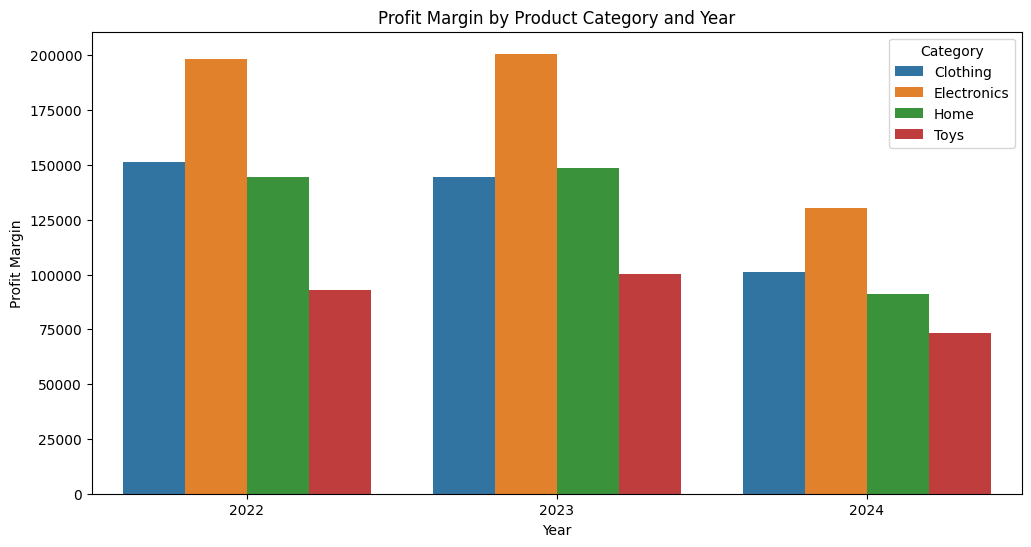

In [16]:
# Quick histogram aggregated by category and year
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Profit", hue="Category", data=profit_margin)
plt.title("Profit Margin by Product Category and Year")
plt.xlabel("Year")
plt.ylabel("Profit Margin")
plt.legend(title="Category")
plt.show()

In [17]:
# 3. Top 10 Selling Products by Sales Volume
top_10_selling_products = (merged_df.groupby("ProductName")["QuantitySold"].sum().nlargest(10).reset_index())

print("\nTop 10 Selling Products by Sales Volume:")
print(top_10_selling_products)


Top 10 Selling Products by Sales Volume:
     ProductName  QuantitySold
0            Bed        4598.0
1        T-shirt        4258.0
2       Sneakers        4124.0
3  Action Figure        4092.0
4     Headphones        4062.0
5      Bookshelf        4061.0
6           Doll        4056.0
7          Jeans        4010.0
8     Smartphone        3980.0
9          Chair        3968.0


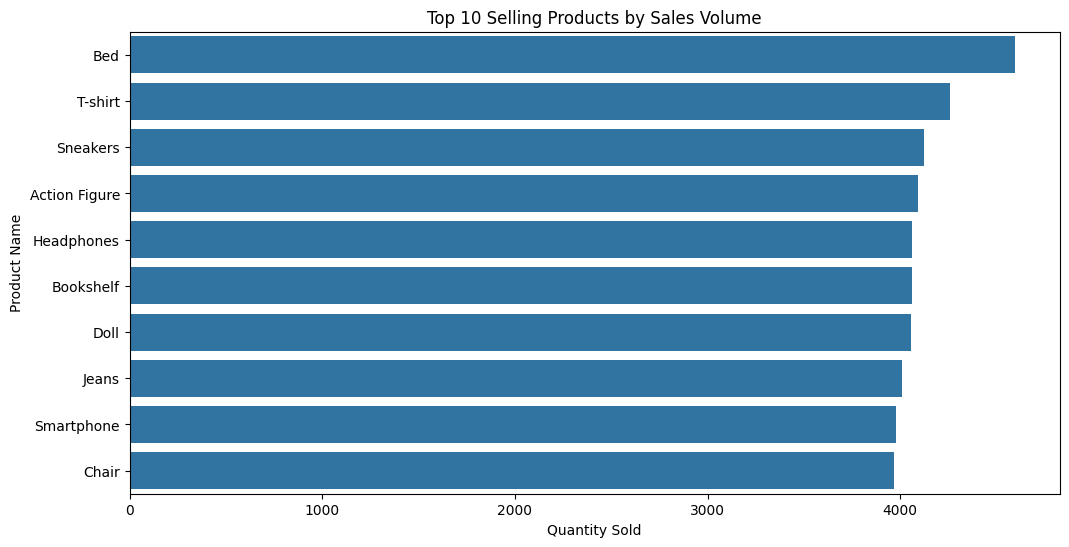

In [18]:
# Quick bar graph for to selling products
plt.figure(figsize=(12, 6))
sns.barplot(x="QuantitySold", y="ProductName", data=top_10_selling_products)
plt.title("Top 10 Selling Products by Sales Volume")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

In [19]:
# 4. Sales Trend Analysis over the last 12 months
last_date = merged_df["DateTime"].max()
last_12_months = merged_df[merged_df["DateTime"] >= (last_date - pd.DateOffset(months=12))]
sales_trend = (last_12_months.groupby([last_12_months["DateTime"].dt.to_period("M")])["SalesAmount"].sum().reset_index())
sales_trend["DateTime"] = sales_trend["DateTime"]

print("\nSales Trend Analysis over the last 12 months:")
print(sales_trend)


Sales Trend Analysis over the last 12 months:
   DateTime  SalesAmount
0   2023-08      6697.30
1   2023-09    139370.29
2   2023-10    150835.99
3   2023-11    140606.79
4   2023-12    145810.24
5   2024-01    150948.55
6   2024-02    137988.81
7   2024-03    149062.77
8   2024-04    136147.97
9   2024-05    144079.06
10  2024-06    136203.84
11  2024-07    154834.01
12  2024-08    131236.61


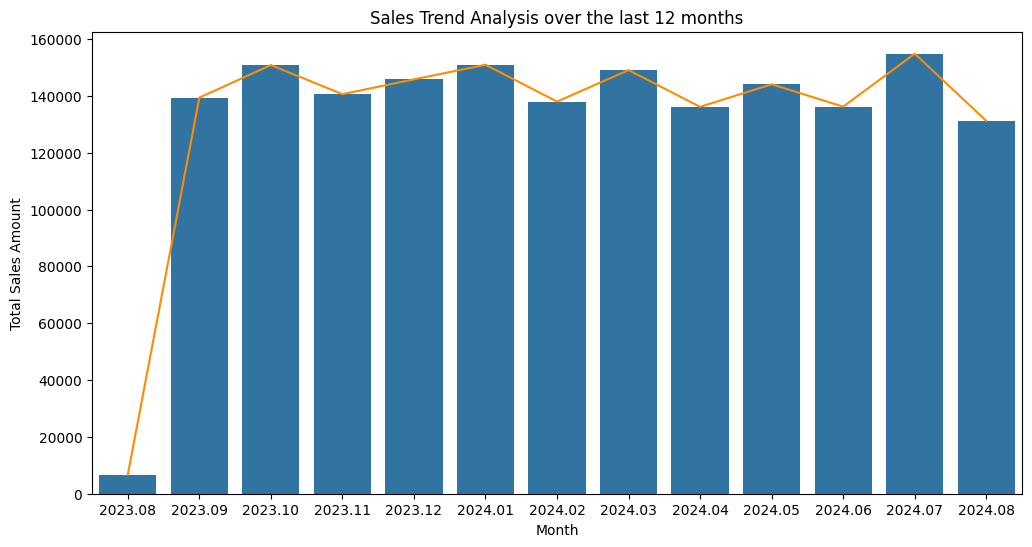

In [20]:
# Quick trend graph
# sales_trend['DateTime'] = pd.to_datetime(sales_trend['DateTime'])
# sales_trend["DateTime"] = sales_trend["DateTime"].dt.to_timestamp("s").dt.strftime("%Y-%m-%d %H:%M:%S.000")
sales_trend["DateTime"] = sales_trend["DateTime"].dt.strftime("%Y.%m")
plt.figure(figsize=(12, 6))
sns.lineplot(x="DateTime", y="SalesAmount", data=sales_trend, color="darkorange")
sns.barplot(x="DateTime", y="SalesAmount", data=sales_trend)
plt.title("Sales Trend Analysis over the last 12 months")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()